In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#실습1
rest=pd.read_csv("레스토랑.csv", encoding="CP949")
rest.head()

,실내시설,메뉴,가격,서비스,편리성,인지도,위생,숙박,이용횟수,레스토랑,지불비용,인원,동반,형태,만족도,재구매,성별,연령,최종학력,소득
0,3,5,4,4,3,4,4,3,5,3,40,2,1,2,4,3,2,51,3,2
1,3,5,5,4,5,4,3,2,2,2,30,1,2,1,3,4,1,48,4,1
2,2,3,3,4,3,4,3,2,2,2,40,3,3,3,3,3,2,48,2,4
3,4,5,3,4,4,3,5,4,3,2,20,2,2,1,4,4,1,34,4,3
4,5,5,4,4,4,3,5,4,7,1,30,2,3,2,4,4,2,35,5,2


In [2]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   실내시설    221 non-null    int64
 1   메뉴      221 non-null    int64
 2   가격      221 non-null    int64
 3   서비스     221 non-null    int64
 4   편리성     221 non-null    int64
 5   인지도     221 non-null    int64
 6   위생      221 non-null    int64
 7   숙박      221 non-null    int64
 8   이용횟수    221 non-null    int64
 9   레스토랑    221 non-null    int64
 10  지불비용    221 non-null    int64
 11  인원      221 non-null    int64
 12  동반      221 non-null    int64
 13  형태      221 non-null    int64
 14  만족도     221 non-null    int64
 15  재구매     221 non-null    int64
 16  성별      221 non-null    int64
 17  연령      221 non-null    int64
 18  최종학력    221 non-null    int64
 19  소득      221 non-null    int64
dtypes: int64(20)
memory usage: 34.7 KB


In [3]:
#실습2
# 8개 변수(실내시설 ~ 숙박) 선택
rest_x=rest.iloc[:,0:8]
rest_x.head()

,실내시설,메뉴,가격,서비스,편리성,인지도,위생,숙박
0,3,5,4,4,3,4,4,3
1,3,5,5,4,5,4,3,2
2,2,3,3,4,3,4,3,2
3,4,5,3,4,4,3,5,4
4,5,5,4,4,4,3,5,4


In [4]:
# 계층적 군집분석 model
# method=complete(완전결합방식)
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
clusters = linkage(y=rest_x, method='complete', metric='euclidean')
clusters
clusters.shape

(220, 4)

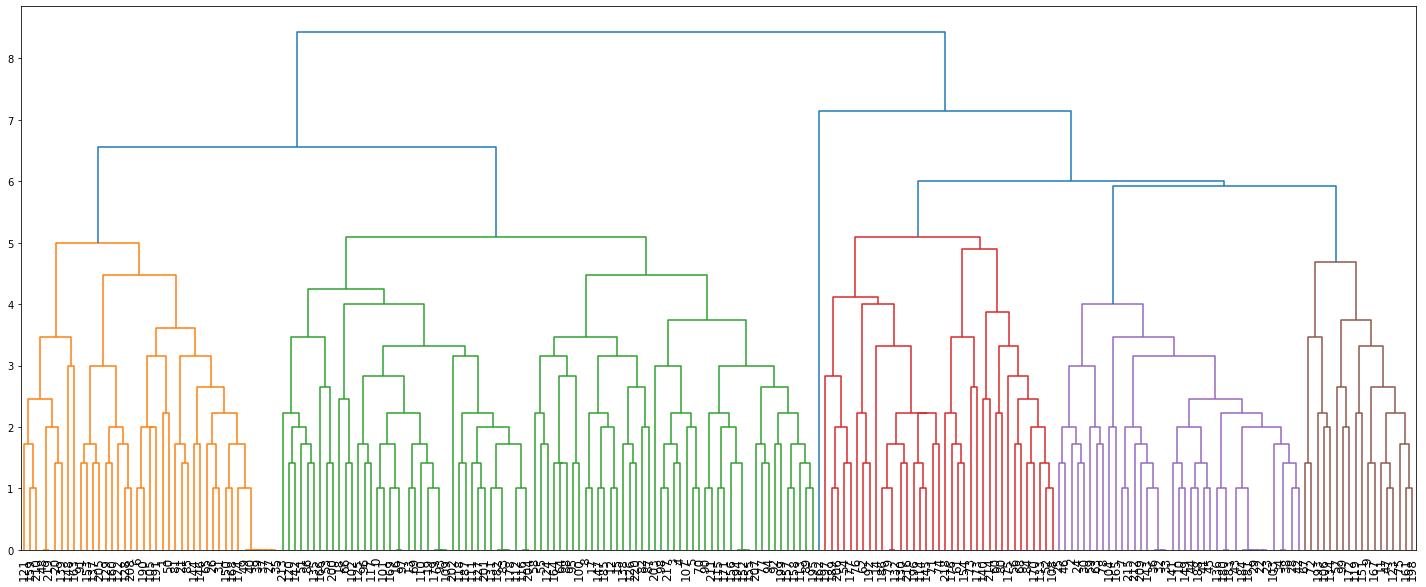

In [5]:
# 덴드로그램 시각화 : 군집수 결정
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12)
# leaf_rotation=90 : 글자 각도
# leaf_font_size=20 : 글자 사이즈
plt.show() 

In [6]:
# 클러스터링(군집) 결과
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기
cut_tree = fcluster(clusters, t=5.5, criterion='distance')
cut_tree

array([2, 1, 4, 2, 2, 2, 1, 4, 2, 5, 4, 5, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1,
       4, 4, 4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4,
       4, 4, 4, 5, 1, 1, 1, 2, 3, 2, 3, 2, 3, 5, 2, 4, 3, 3, 3, 4, 2, 1,
       2, 5, 3, 2, 2, 3, 5, 3, 3, 5, 3, 2, 4, 3, 3, 1, 2, 2, 3, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 4, 4, 1, 5, 2, 3, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 5, 2, 1, 1, 5, 2, 2, 2, 2, 1, 1, 3, 2,
       3, 3, 5, 2, 4, 1, 2, 1, 3, 4, 2, 4, 1, 3, 1, 2, 1, 4, 1, 5, 2, 1,
       3, 2, 2, 2, 2, 1, 1, 5, 6, 1, 2, 4, 2, 5, 1, 2, 3, 2, 5, 3, 1, 3,
       3, 3, 2, 2, 4, 4, 2, 4, 4, 2, 3, 2, 4, 3, 1, 1, 3, 5, 2, 2, 3, 3,
       5, 2, 2, 2, 2, 2, 2, 1, 3, 2, 1, 4, 1, 2, 4, 2, 3, 4, 3, 2, 3, 1,
       2], dtype=int32)

In [7]:
#실습3
## 비계층적 군집분석
import pandas as pd 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
# 비계층적 군집 분석 model : k-mean
model= KMeans(n_clusters=6, random_state=0, algorithm='auto')
model.fit(rest_x[0:8])

KMeans(n_clusters=6, random_state=0)

In [8]:
pred=model.predict(rest_x)
rest["cluster"]=pred
pred

array([5, 3, 1, 0, 0, 0, 2, 4, 0, 1, 1, 4, 0, 5, 5, 4, 5, 0, 5, 4, 3, 3,
       1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1,
       1, 5, 1, 1, 5, 4, 4, 4, 4, 1, 5, 0, 4, 1, 0, 1, 4, 1, 1, 1, 0, 3,
       0, 1, 4, 5, 0, 1, 1, 1, 1, 4, 5, 0, 1, 5, 4, 2, 0, 0, 4, 3, 4, 0,
       0, 0, 0, 5, 0, 4, 0, 0, 5, 5, 0, 1, 0, 5, 0, 2, 4, 2, 1, 0, 4, 4,
       4, 4, 5, 0, 1, 0, 5, 5, 5, 1, 4, 3, 3, 4, 0, 5, 5, 1, 3, 3, 5, 5,
       5, 4, 1, 4, 2, 3, 4, 3, 4, 2, 4, 4, 2, 1, 4, 4, 3, 1, 3, 1, 0, 3,
       1, 0, 0, 0, 0, 0, 3, 1, 4, 4, 5, 4, 3, 1, 4, 4, 4, 0, 1, 4, 5, 4,
       1, 1, 0, 4, 4, 1, 0, 4, 1, 0, 1, 5, 4, 1, 2, 2, 1, 1, 0, 0, 1, 4,
       4, 0, 1, 1, 5, 0, 5, 3, 1, 0, 3, 4, 3, 0, 4, 2, 0, 4, 5, 0, 2, 5,
       0])

In [9]:
#실습 3-1 군집별 연령의 차이
from scipy import stats
stats.levene(rest["연령"][rest["cluster"]==0], rest["연령"][rest["cluster"]==1],
             rest["연령"][rest["cluster"]==2], rest["연령"][rest["cluster"]==3],
             rest["연령"][rest["cluster"]==4], rest["연령"][rest["cluster"]==5])

LeveneResult(statistic=6.820921871932536, pvalue=6.295240919554186e-06)

In [10]:
# 분산분석 : bmi지수
import statsmodels.api as sm
import statsmodels.formula.api as smf
fit1=smf.ols('연령~cluster', rest).fit()
sm.stats.anova_lm(fit1, typ=1) 

,df,sum_sq,mean_sq,F,PR(>F)
cluster,1.0,266.579266,266.579266,2.819938,0.094526
Residual,219.0,20702.886797,94.533730,NaN,NaN


In [11]:
rest.groupby('cluster').mean()[["연령"]]

,연령
cluster,
0,32.978723
1,40.018868
2,38.000000
3,35.210526
4,38.000000
5,38.806452


In [12]:
rest.loc[(rest["연령"]>=20) & (rest["연령"]<30), '연령대']='20대'
rest.loc[(rest["연령"]>=30) & (rest["연령"]<50), '연령대']='30대~40대'
rest.loc[(rest["연령"]>=50), '연령대']='50대 이상'

In [13]:
d_table=pd.crosstab(rest["cluster"], rest["연령대"])
d_table

연령대,20대,30대~40대,50대 이상
cluster,,,
0,10,37,0
1,11,27,15
2,4,7,2
3,5,13,1
4,14,34,10
5,5,20,6


In [14]:
#카이제곱 검정결과 : 귀무가설 기각 (cluster에 따른 연령(대)의 차이가 있다.)
from scipy.stats import chi2_contingency
chi,p,df,expected=chi2_contingency(d_table)
# 카이제곱검정통계량과 유의확률
print("chisquare=%.3f" % chi, "P-value=%.3f" % p)

chisquare=19.486 P-value=0.035


In [15]:
# 행별 비율표(propotion table)
pd.crosstab(rest["cluster"], rest["연령대"], normalize='index').round(4)

연령대,20대,30대~40대,50대 이상
cluster,,,
0,0.2128,0.7872,0.0000
1,0.2075,0.5094,0.2830
2,0.3077,0.5385,0.1538
3,0.2632,0.6842,0.0526
4,0.2414,0.5862,0.1724
5,0.1613,0.6452,0.1935


In [16]:
#실습 3-2 군집별 지불비용의 차이
from scipy import stats
stats.levene(rest["지불비용"][rest["cluster"]==0], rest["지불비용"][rest["cluster"]==1],
             rest["지불비용"][rest["cluster"]==2], rest["지불비용"][rest["cluster"]==3],
             rest["지불비용"][rest["cluster"]==4], rest["지불비용"][rest["cluster"]==5])

LeveneResult(statistic=1.7263568569962784, pvalue=0.12973109484576517)

In [17]:
# 분산분석 : bmi지수
import statsmodels.api as sm
import statsmodels.formula.api as smf
fit1=smf.ols('지불비용~cluster', rest).fit()
sm.stats.anova_lm(fit1, typ=1) 

,df,sum_sq,mean_sq,F,PR(>F)
cluster,1.0,8.329369e+01,83.293687,0.013211,0.908599
Residual,219.0,1.380774e+06,6304.905269,NaN,NaN


In [18]:
rest.groupby('cluster').mean()[["지불비용"]]

,지불비용
cluster,
0,50.659574
1,69.528302
2,106.153846
3,50.894737
4,50.327586
5,74.032258


In [19]:
rest.loc[(rest["지불비용"]<50), '지불비용1']='50만원 미만'
rest.loc[(rest["지불비용"]>=50) & (rest["지불비용"]<100), '지불비용1']="50만원 이상~100만원 미만"
rest.loc[(rest["지불비용"]>=100), '지불비용1']='100만원이상'

,실내시설,메뉴,가격,서비스,편리성,인지도,위생,숙박,이용횟수,레스토랑,...,형태,만족도,재구매,성별,연령,최종학력,소득,cluster,연령대,지불비용1
0,3,5,4,4,3,4,4,3,5,3,...,2,4,3,2,51,3,2,5,50대 이상,50만원 미만
1,3,5,5,4,5,4,3,2,2,2,...,1,3,4,1,48,4,1,3,30대~40대,50만원 미만
2,2,3,3,4,3,4,3,2,2,2,...,3,3,3,2,48,2,4,1,30대~40대,50만원 미만
3,4,5,3,4,4,3,5,4,3,2,...,1,4,4,1,34,4,3,0,30대~40대,50만원 미만
4,5,5,4,4,4,3,5,4,7,1,...,2,4,4,2,35,5,2,0,30대~40대,50만원 미만


In [20]:
d_table=pd.crosstab(rest["cluster"], rest["지불비용1"])
d_table

지불비용1,100만원이상,50만원 미만,50만원 이상~100만원 미만
cluster,,,
0,8,28,11
1,11,26,16
2,3,6,4
3,2,11,6
4,9,35,14
5,8,9,14


In [21]:
#카이제곱 검정결과 : 귀무가설 채택 (cluster에 따른 지불비용의 차이가 없다.)
from scipy.stats import chi2_contingency
chi,p,df,expected=chi2_contingency(d_table)
# 카이제곱검정통계량과 유의확률
print("chisquare=%.3f" % chi, "P-value=%.3f" % p)

chisquare=10.695 P-value=0.382


In [22]:
# 행별 비율표(propotion table)
pd.crosstab(rest["cluster"], rest["지불비용1"], normalize='index').round(4)

지불비용1,100만원이상,50만원 미만,50만원 이상~100만원 미만
cluster,,,
0,0.1702,0.5957,0.2340
1,0.2075,0.4906,0.3019
2,0.2308,0.4615,0.3077
3,0.1053,0.5789,0.3158
4,0.1552,0.6034,0.2414
5,0.2581,0.2903,0.4516


In [23]:
#실습 3-3 군집별 소득의 차이
#크래머의 법칙에 위배


소득,1,2,3,4,5,6
cluster,,,,,,
0,13,21,8,4,1,0
1,2,2,8,12,14,15
2,5,2,0,1,3,2
3,4,5,5,2,2,1
4,8,16,4,9,12,9
5,6,10,6,4,1,4


In [24]:
#실습 3-3 군집별 소득의 차이
#소득 1, 2 통합 -> 300만 미만
#소득 3, 4 통합 -> 300 ~ 500만
#소득 5, 6 통합 -> 500만 초과
rest.loc[(rest["소득"]==1)|(rest["소득"]==2), '소득1']='300만 미만'
rest.loc[(rest["소득"]==3)|(rest["소득"]==4), '소득1']='300~ 500만'
rest.loc[(rest["소득"]==5)|(rest["소득"]==6), '소득1']='500만 초과'

0        300만 미만
1        300만 미만
2      300~ 500만
3      300~ 500만
4        300만 미만
         ...    
216    300~ 500만
217      300만 미만
218      500만 초과
219      300만 미만
220      300만 미만
Name: 소득1, Length: 221, dtype: object

In [25]:
d_table=pd.crosstab(rest["cluster"], rest["소득1"])
d_table

소득1,300~ 500만,300만 미만,500만 초과
cluster,,,
0,12,34,1
1,20,4,29
2,1,7,5
3,7,9,3
4,13,24,21
5,10,16,5


In [26]:
#카이제곱 검정결과 : 귀무가설 기각 (cluster에 따른 소득의 차이가 있다.)
from scipy.stats import chi2_contingency
chi,p,df,expected=chi2_contingency(d_table)
# 카이제곱검정통계량과 유의확률
print("chisquare=%.3f" % chi, "P-value=%.3f" % p)

chisquare=59.445 P-value=0.000


In [27]:
# 행별 비율표(propotion table)
pd.crosstab(rest["cluster"], rest["소득1"], normalize='index').round(4)

소득1,300~ 500만,300만 미만,500만 초과
cluster,,,
0,0.2553,0.7234,0.0213
1,0.3774,0.0755,0.5472
2,0.0769,0.5385,0.3846
3,0.3684,0.4737,0.1579
4,0.2241,0.4138,0.3621
5,0.3226,0.5161,0.1613


In [28]:
#실습 3-4 군집별 만족도의 차이
d_table=pd.crosstab(rest["cluster"], rest["만족도"])
d_table

만족도,2,3,4,5
cluster,,,,
0,0,11,33,3
1,4,31,18,0
2,0,2,10,1
3,0,7,11,1
4,0,24,32,2
5,0,9,21,1


In [29]:
#카이제곱 검정결과 : 귀무가설 채택 (cluster에 따른 만족도에 차이가 있다.)
from scipy.stats import chi2_contingency
chi,p,df,expected=chi2_contingency(d_table)
# 카이제곱검정통계량과 유의확률
print("chisquare=%.3f" % chi, "P-value=%.3f" % p)

chisquare=35.417 P-value=0.002


In [30]:
# 비행별 비율표(propotion table)
pd.crosstab(rest["cluster"], rest["만족도"], normalize='index').round(4)

만족도,2,3,4,5
cluster,,,,
0,0.0000,0.2340,0.7021,0.0638
1,0.0755,0.5849,0.3396,0.0000
2,0.0000,0.1538,0.7692,0.0769
3,0.0000,0.3684,0.5789,0.0526
4,0.0000,0.4138,0.5517,0.0345
5,0.0000,0.2903,0.6774,0.0323


In [31]:
#실습4
#실습4-1선형판별분석 : LDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [45]:
## 전체 자료에 대한 판별분석과 분류정확도
x = rest.iloc[:, 0:8]
y = rest["cluster"]
lda = LinearDiscriminantAnalysis()
lda=lda.fit(x, y)
print( "R²=", lda.score(x, y))

R²= 0.9230769230769231


In [34]:
# 모형예측(분류) 
y_fit=lda.predict(x)
y_pred= lda.predict(x)
confusion_matrix(y, y_pred)

array([[46,  0,  0,  1,  0,  0],
       [ 0, 49,  1,  0,  2,  1],
       [ 0,  0, 12,  0,  1,  0],
       [ 0,  2,  0, 16,  1,  0],
       [ 2,  0,  0,  0, 56,  0],
       [ 2,  3,  0,  1,  0, 25]], dtype=int64)

In [35]:
# 모형평가(분류정확도_보고서) 종합정리
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.91      0.92      0.92        53
           2       0.92      0.92      0.92        13
           3       0.89      0.84      0.86        19
           4       0.93      0.97      0.95        58
           5       0.96      0.81      0.88        31

    accuracy                           0.92       221
   macro avg       0.92      0.91      0.91       221
weighted avg       0.92      0.92      0.92       221



In [36]:
#실습4-2SVM
# upport vector machine : SVM - 분석
from sklearn.model_selection import train_test_split  
import pandas as pd
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix 

In [51]:
# SVM - 분류정확도 분석(선형)
svclassifier = SVC(kernel='linear')  
svclassifier.fit(x, y) 
y_pred = svclassifier.predict(x)  
print('score : ',svclassifier.score(x,y))
print(confusion_matrix(y, y_pred))  
print(classification_report(y, y_pred))

score :  0.9728506787330317
[[45  0  0  1  1  0]
 [ 0 52  0  0  0  1]
 [ 0  0 13  0  0  0]
 [ 0  0  0 18  1  0]
 [ 2  0  0  0 56  0]
 [ 0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       1.00      0.98      0.99        53
           2       1.00      1.00      1.00        13
           3       0.95      0.95      0.95        19
           4       0.97      0.97      0.97        58
           5       0.97      1.00      0.98        31

    accuracy                           0.97       221
   macro avg       0.97      0.98      0.97       221
weighted avg       0.97      0.97      0.97       221



In [38]:
# SVM - 커널함수= 다항식(poly)
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(x, y) 
y_pred = svclassifier.predict(x)  
print('score : ',svclassifier.score(x,y))
print(confusion_matrix(y, y_pred))  
print(classification_report(y, y_pred))

score :  1.0
[[47  0  0  0  0  0]
 [ 0 53  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 19  0  0]
 [ 0  0  0  0 58  0]
 [ 0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        58
           5       1.00      1.00      1.00        31

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



In [50]:
# SVM - 커널함수= 가우시안(정규분포함수)
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(x, y) 
y_pred = svclassifier.predict(x)  
print('score : ',svclassifier.score(x,y))
print(confusion_matrix(y, y_pred))  
print(classification_report(y, y_pred))  

score :  0.9592760180995475
[[46  0  0  1  0  0]
 [ 0 52  0  0  0  1]
 [ 0  0 12  0  1  0]
 [ 0  0  0 19  0  0]
 [ 2  0  0  0 56  0]
 [ 1  0  0  1  2 27]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       1.00      0.98      0.99        53
           2       1.00      0.92      0.96        13
           3       0.90      1.00      0.95        19
           4       0.95      0.97      0.96        58
           5       0.96      0.87      0.92        31

    accuracy                           0.96       221
   macro avg       0.96      0.95      0.96       221
weighted avg       0.96      0.96      0.96       221



In [52]:
# SVM - 커널함수= 시그모이드(로지스틱함수)
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(x, y) 
y_pred = svclassifier.predict(x)  
print('score : ',svclassifier.score(x,y))
print(confusion_matrix(y, y_pred))  
print(classification_report(y, y_pred))  

score :  0.26244343891402716
[[ 0  0  0  0 47  0]
 [ 0  0  0  0 53  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0 58  0]
 [ 0  0  0  0 31  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        19
           4       0.26      1.00      0.42        58
           5       0.00      0.00      0.00        31

    accuracy                           0.26       221
   macro avg       0.04      0.17      0.07       221
weighted avg       0.07      0.26      0.11       221



C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
